In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/irisflower/Iris.csv


# IRIS FLOWER CLASSIFICATION PROJECT.

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
%matplotlib inline

In [3]:
df=pd.read_csv('/kaggle/input/irisflower/Iris.csv')

In [4]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [5]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#describing about the dataset
df.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [7]:
df.shape

(150, 6)

We drop the column id because it is not important.¶

In [8]:
df.drop('Id',axis=1,inplace=True)

In [9]:
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [10]:
#count the value
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [11]:
#finding the null value
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

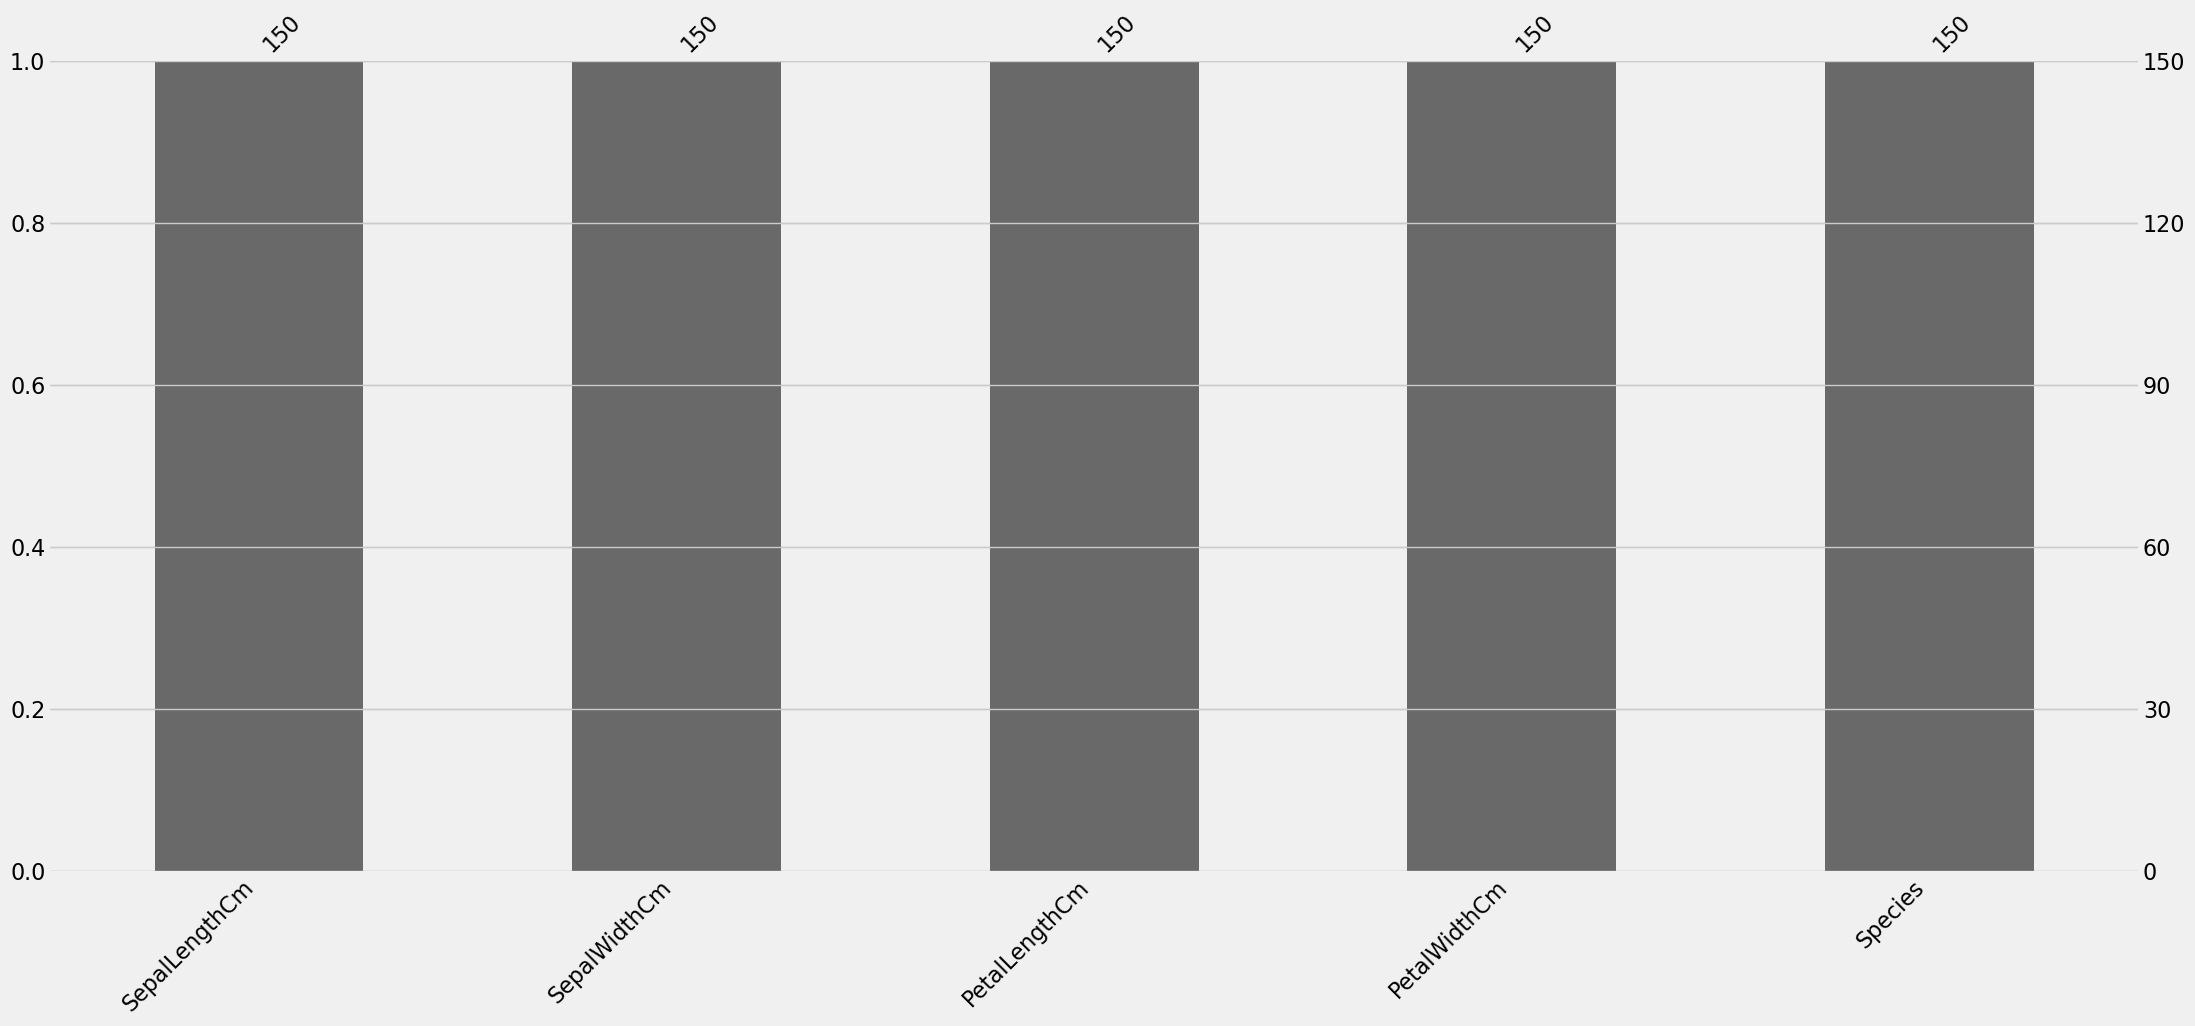

In [12]:
import missingno as msno
msno.bar(df)

In [13]:
df.drop_duplicates(inplace=True)

# EDA

# 1. Relationship between species and sepal length¶


<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

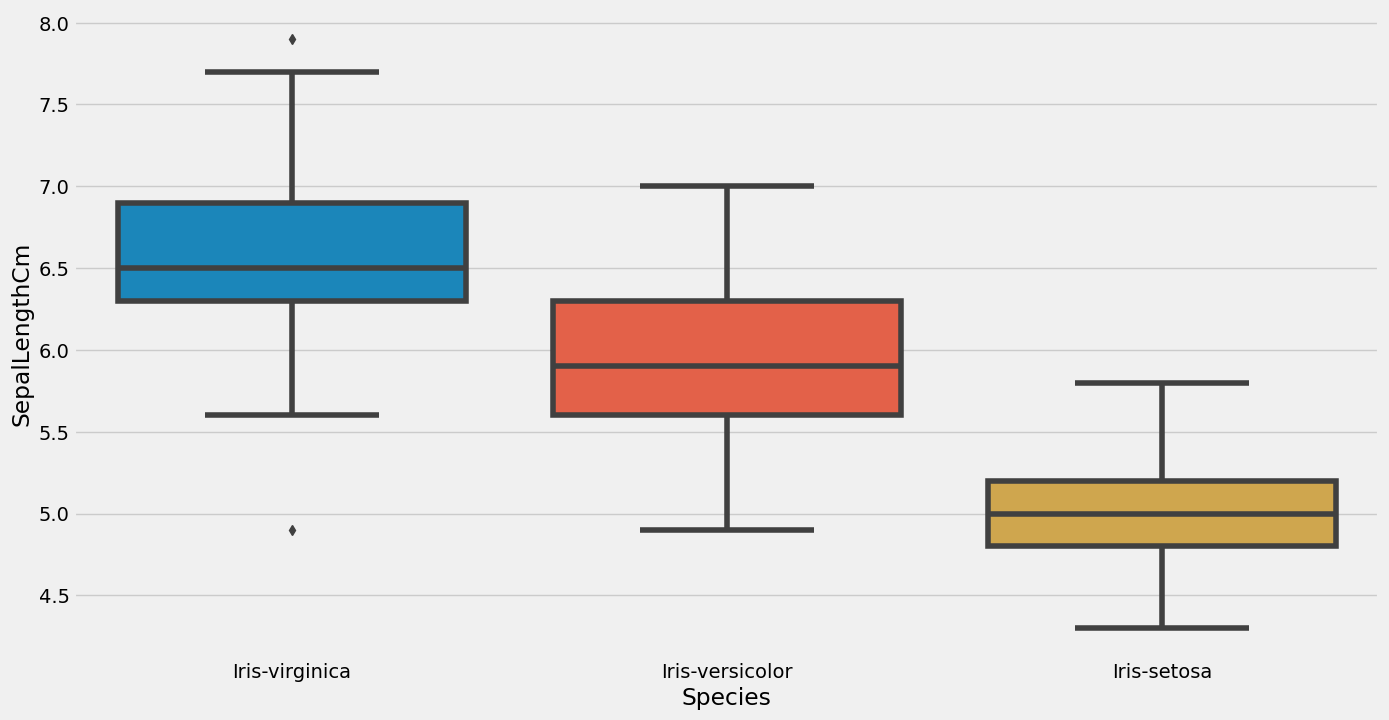

In [14]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=False))

# 2. Relationship between species and sepal width¶


<AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

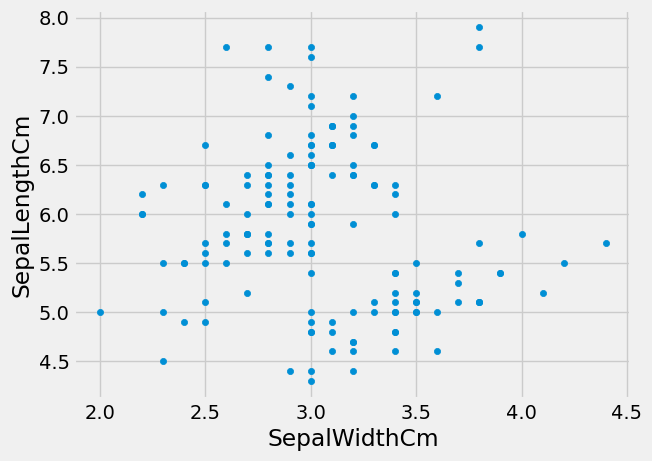

In [15]:
df.plot(kind='scatter',x='SepalWidthCm',y='SepalLengthCm')

# 3. Relationship between sepal width and sepal length¶


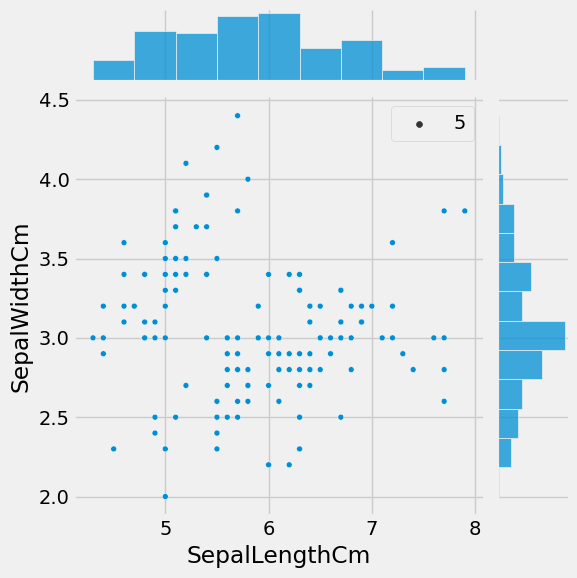

In [16]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)

# 4.Pairplot¶

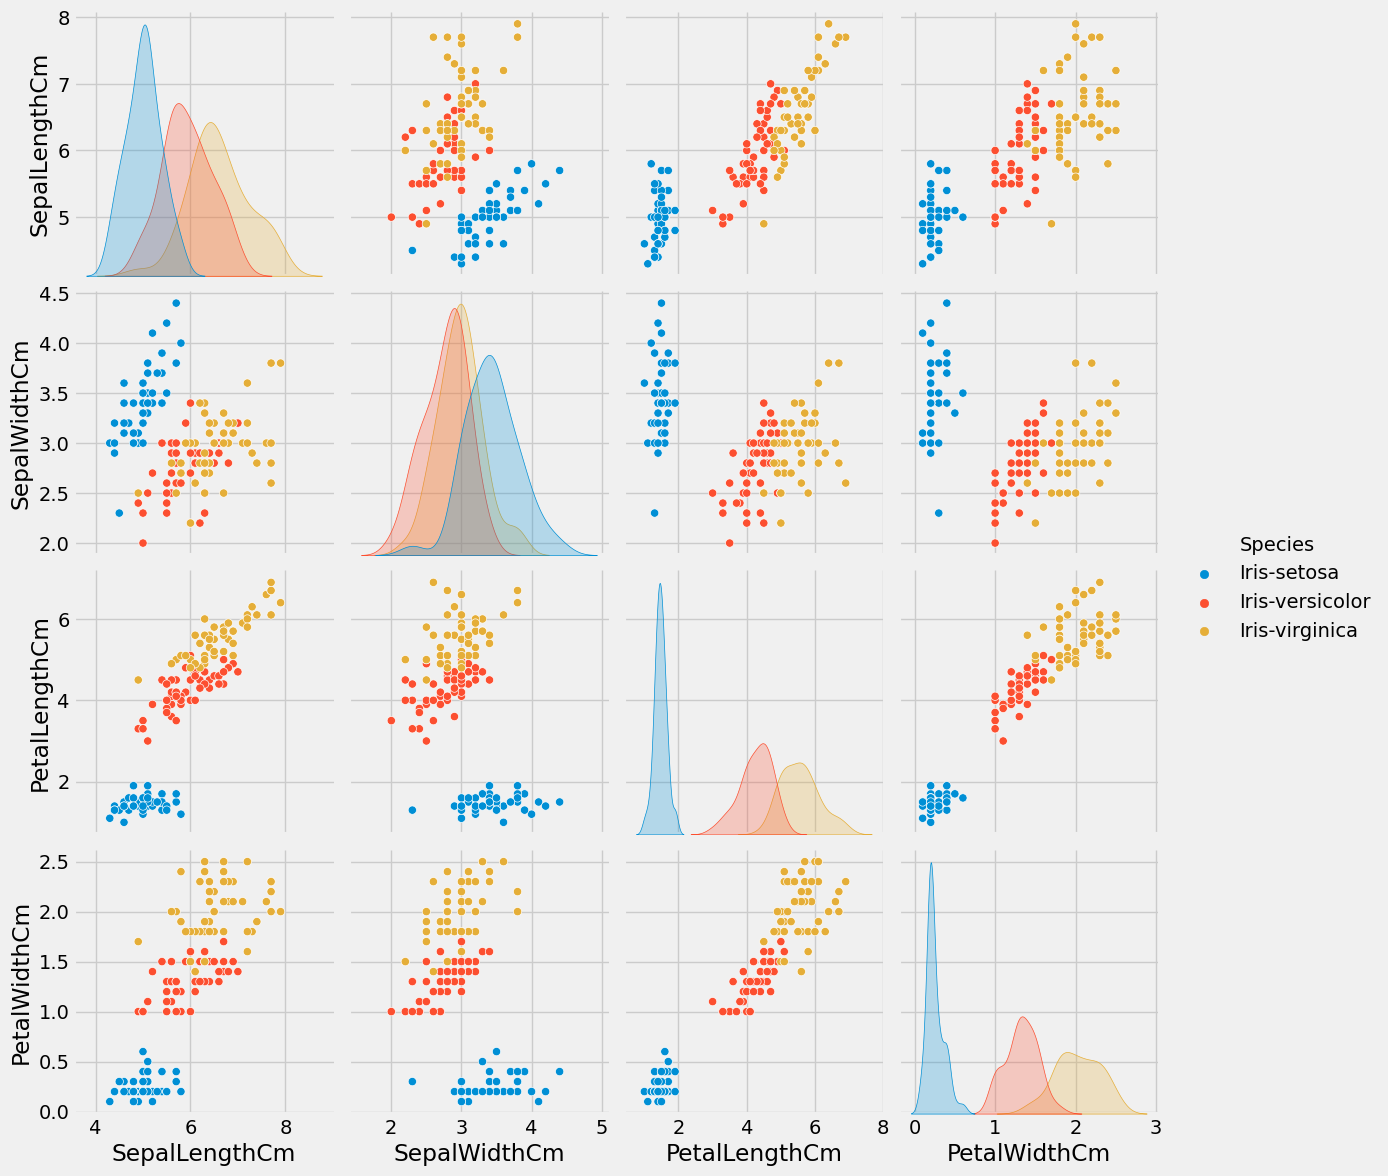

In [17]:
sns.pairplot(df, hue="Species", size=3)


# 5. Boxplot¶


array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

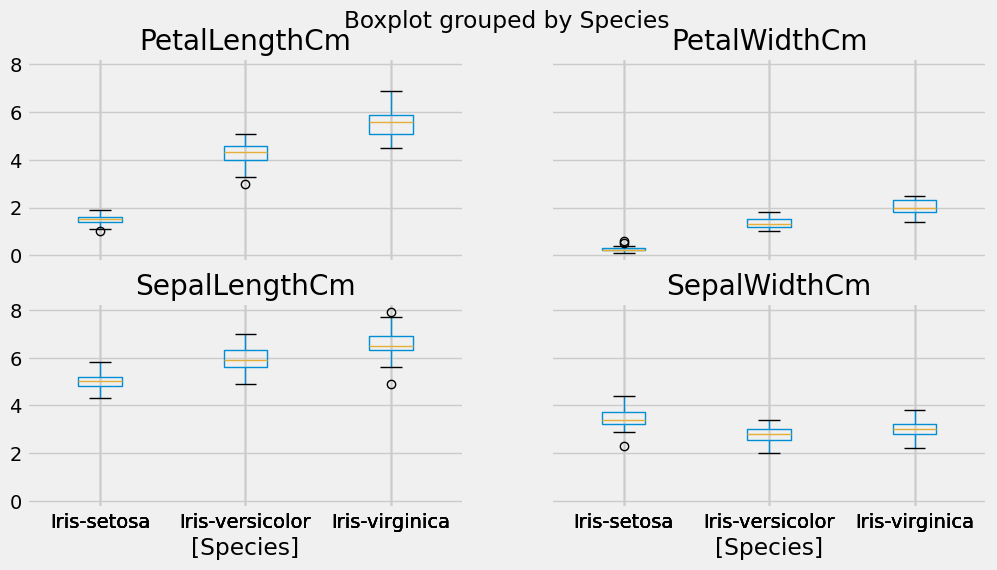

In [18]:
df.boxplot(by="Species", figsize=(12, 6))

# 5. Andrews_curves¶

<AxesSubplot:>

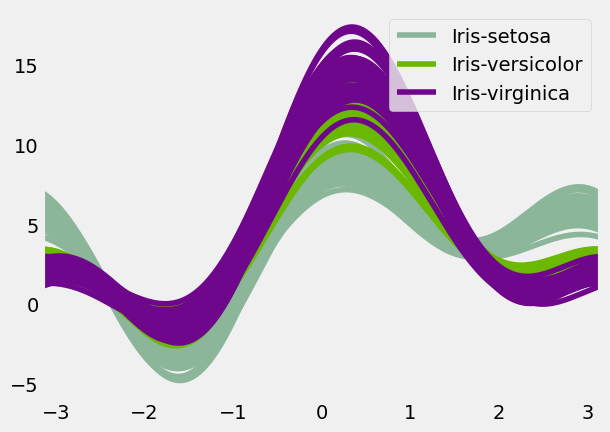

In [19]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "Species")

# 6.CategoricalPlot¶

<Figure size 1500x1500 with 0 Axes>

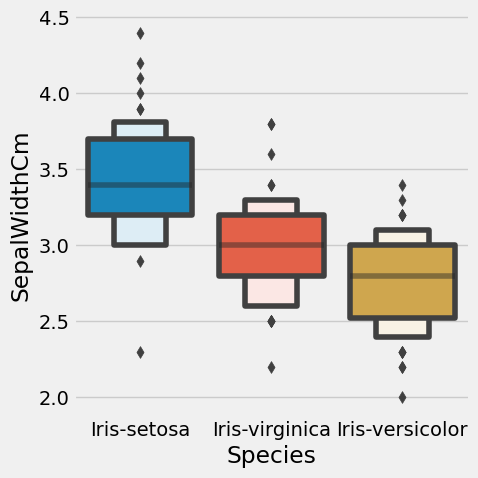

In [20]:
plt.figure(figsize=(15,15))
sns.catplot(x='Species',y='SepalWidthCm',data=df.sort_values('SepalWidthCm',ascending=False),kind='boxen')

# 7.Violinplot¶



<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

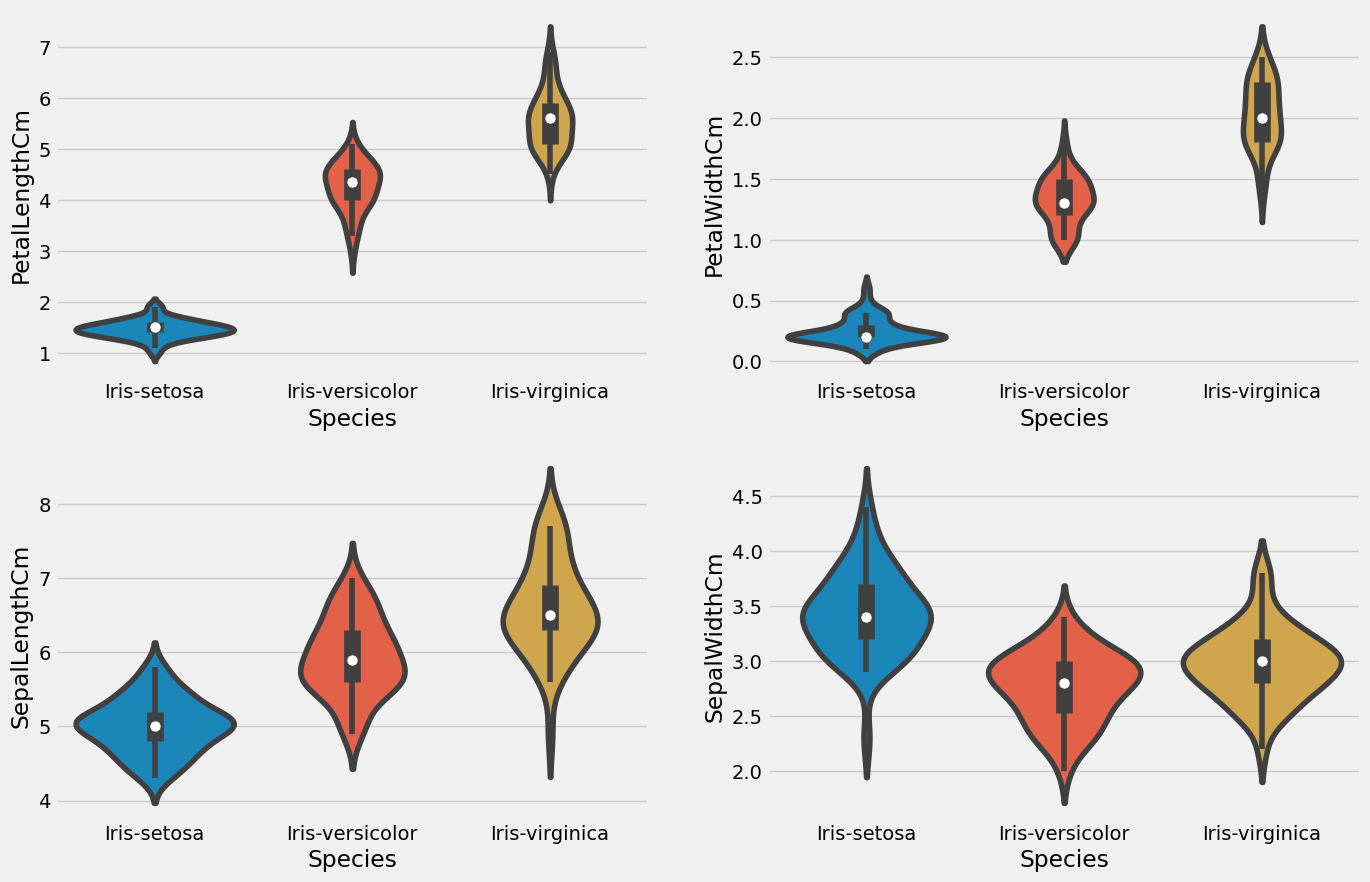

In [21]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

# Neural Network


In [22]:
X=df.drop('Species',axis=1)
y=df['Species']

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [24]:
df['Species'] = pd.Categorical(df.Species)
df['Species'] = df.Species.cat.codes
# Turn response variable into one-hot response vectory = to_categorical(df.response)
y = to_categorical(df.Species)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [26]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))

2023-02-19 20:41:49.509553: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64::/opt/conda/lib
2023-02-19 20:41:49.509609: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


In [27]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 [==============================] - 1s 76ms/step - loss: 1.3851 - accuracy: 0.2353 - val_loss: 1.3102 - val_accuracy: 0.3333
Epoch 2/45
4/4 [==============================] - 0s 10ms/step - loss: 1.2887 - accuracy: 0.3333 - val_loss: 1.2423 - val_accuracy: 0.3333
Epoch 3/45
4/4 [==============================] - 0s 10ms/step - loss: 1.2169 - accuracy: 0.3235 - val_loss: 1.1760 - val_accuracy: 0.3333
Epoch 4/45
4/4 [==============================] - 0s 10ms/step - loss: 1.1566 - accuracy: 0.2647 - val_loss: 1.1151 - val_accuracy: 0.0667
Epoch 5/45
4/4 [==============================] - 0s 10ms/step - loss: 1.1022 - accuracy: 0.1078 - val_loss: 1.0643 - val_accuracy: 0.2222
Epoch 6/45
4/4 [==============================] - 0s 10ms/step - loss: 1.0517 - accuracy: 0.2255 - val_loss: 1.0171 - val_accuracy: 0.1111
Epoch 7/45
4/4 [==============================] - 0s 11ms/step - loss: 1.0076 - accuracy: 0.2157 - val_loss: 0.9780 - val_accuracy: 0.3333
Epoch 8/45
4/4 [===========

In [29]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.4276 - accuracy: 0.8000


[0.42762884497642517, 0.800000011920929]

In [30]:
pred = model.predict(X_test[:10])
print(pred)

1/1 [==============================] - 0s 337ms/step
[[0.00802415 0.28137133 0.7106045 ]
 [0.00575175 0.2811899  0.71305835]
 [0.10107949 0.4898209  0.40909946]
 [0.05443483 0.46048665 0.48507845]
 [0.9069291  0.07545236 0.01761852]
 [0.06095529 0.47320515 0.46583953]
 [0.00679205 0.24311544 0.75009245]
 [0.00750435 0.2573751  0.73512053]
 [0.9055023  0.07734471 0.01715296]
 [0.01729908 0.34809306 0.63460785]]


In [31]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[2 2 1 2 0 1 2 2 0 2]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [32]:
history.history['accuracy']

[0.23529411852359772,
 0.3333333432674408,
 0.3235294222831726,
 0.2647058963775635,
 0.10784313827753067,
 0.22549019753932953,
 0.21568627655506134,
 0.3333333432674408,
 0.4019607901573181,
 0.6372548937797546,
 0.656862735748291,
 0.656862735748291,
 0.656862735748291,
 0.7549019455909729,
 0.9215686321258545,
 0.7549019455909729,
 0.656862735748291,
 0.656862735748291,
 0.656862735748291,
 0.656862735748291,
 0.6666666865348816,
 0.686274528503418,
 0.813725471496582,
 0.9803921580314636,
 0.970588207244873,
 0.970588207244873,
 0.8333333134651184,
 0.686274528503418,
 0.7352941036224365,
 0.8039215803146362,
 0.8333333134651184,
 0.9313725233078003,
 0.9803921580314636,
 0.9803921580314636,
 0.9803921580314636,
 0.9803921580314636,
 0.9607843160629272,
 0.9019607901573181,
 0.9313725233078003,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.9313725233078003,
 0.8921568393707275,
 0.8823529481887817]

In [33]:
history.history['val_accuracy']

[0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.06666667014360428,
 0.2222222238779068,
 0.1111111119389534,
 0.3333333432674408,
 0.3333333432674408,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.9111111164093018,
 0.7333333492279053,
 0.7111111283302307,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.7111111283302307,
 0.7555555701255798,
 0.9111111164093018,
 0.9777777791023254,
 0.9333333373069763,
 0.8666666746139526,
 0.7111111283302307,
 0.7111111283302307,
 0.7777777910232544,
 0.7777777910232544,
 0.8666666746139526,
 0.9333333373069763,
 0.9555555582046509,
 0.9555555582046509,
 0.9333333373069763,
 0.9333333373069763,
 0.8666666746139526,
 0.8666666746139526,
 0.9111111164093018,
 0.9111111164093018,
 0.9333333373069763,
 0.9111111164093018,
 0.8444444537162781,
 0.8666666746139526,
 0.800000011920929]

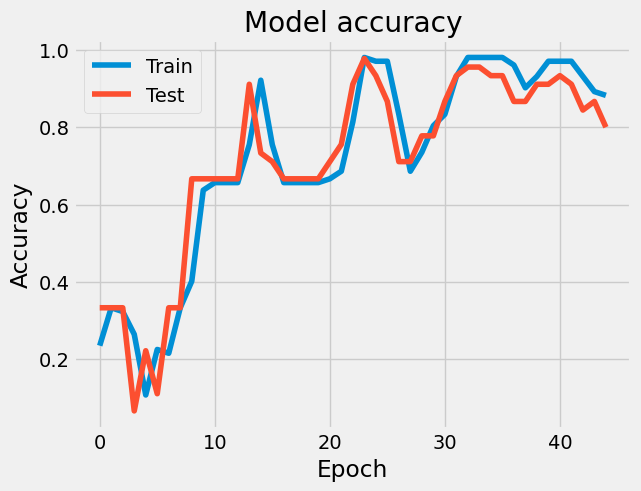

In [34]:
plt.figure()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()